# Représentation des courbes de survie

In [1]:
# importation d'un nouveau jeu de données pour cette semaine
data = read.csv2("alcool.csv")
str(data)

'data.frame':	125 obs. of  5 variables:
 $ t     : int  121 121 40 39 66 64 5 30 34 5 ...
 $ SEVRE : int  0 0 0 0 0 0 1 0 0 0 ...
 $ AGE   : int  53 52 45 48 45 42 35 35 41 37 ...
 $ SEXE  : int  1 2 2 1 1 1 1 1 1 1 ...
 $ EDVNEG: int  0 0 0 1 0 0 0 0 0 0 ...


In [2]:
library(survival)

In [31]:
surv = survfit(Surv(data$t, data$SEVRE) ~1)
print(model1)

Call: survfit(formula = Surv(data$t, data$SEVRE) ~ 1)

      n  events  median 0.95LCL 0.95UCL 
    125      27      NA     160      NA 


In [30]:
survfit(Surv(t, SEVRE) ~SEXE, data=data)

Call: survfit(formula = Surv(t, SEVRE) ~ SEXE, data = data)

         n events median 0.95LCL 0.95UCL
SEXE=1 107     24     NA     160      NA
SEXE=2  18      3     NA      84      NA

In [20]:
options(repr.plot.width=4, repr.plot.height=4)

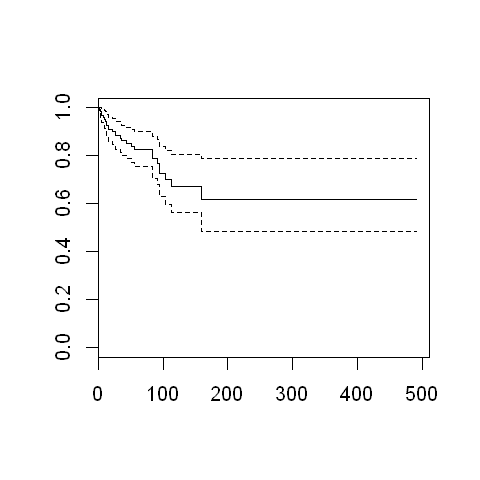

In [32]:
plot(surv)

In [13]:
help(survfit)

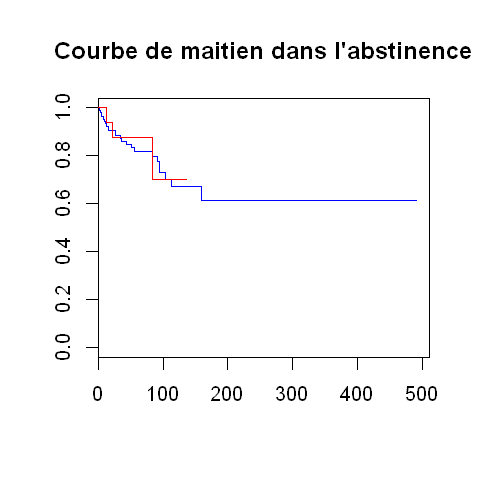

In [22]:
plot(survfit(Surv(t, SEVRE) ~SEXE, data=data),
     col=c('blue', 'red'),
     main="Courbe de maitien dans l'abstinence")

# Tests statistiques

Le test du log-rank, assimilé à un test de rang, possède les conditions de validité :
–Nombreux temps de décès
–Ou de nombreux morts à chaque temps de décès

In [33]:
survdiff(Surv(t, SEVRE) ~SEXE, data=data)

Call:
survdiff(formula = Surv(t, SEVRE) ~ SEXE, data = data)

         N Observed Expected (O-E)^2/E (O-E)^2/V
SEXE=1 107       24    23.74   0.00281    0.0235
SEXE=2  18        3     3.26   0.02046    0.0235

 Chisq= 0  on 1 degrees of freedom, p= 0.9 

In [34]:
diff <- survdiff(Surv(t,SEVRE)~SEXE,data=data)
p <- pchisq(diff$chisq, length(diff$n)-1, lower.tail = FALSE)
sprintf("%.3f",p) # choix du nombre de décimales

[1] "0.878"

Test de l'association de la survie à une variable quantitative --> modèle de Cox

In [35]:
coxph(Surv(t, SEVRE)~AGE, data=data)

Call:
coxph(formula = Surv(t, SEVRE) ~ AGE, data = data)

       coef exp(coef) se(coef)     z     p
AGE -0.0467    0.9544   0.0235 -1.99 0.047

Likelihood ratio test=4.09  on 1 df, p=0.04
n= 125, number of events= 27 

In [36]:
exp(-0.0467)

[1] 0.9543737

Test de l'association de la survie à une liste de variables explicatives --> modèle de Cox

In [37]:
mod = coxph(Surv(t, SEVRE)~AGE+SEXE+EDVNEG, data=data)

In [38]:
print(mod)

Call:
coxph(formula = Surv(t, SEVRE) ~ AGE + SEXE + EDVNEG, data = data)

          coef exp(coef) se(coef)     z     p
AGE    -0.0473    0.9538   0.0237 -2.00 0.046
SEXE   -0.0151    0.9850   0.6206 -0.02 0.981
EDVNEG -0.4428    0.6422   1.0240 -0.43 0.665

Likelihood ratio test=4.31  on 3 df, p=0.2
n= 125, number of events= 27 


In [39]:
# exp(coef) = hazard ratio, ou rapport des risques instantanés de décès

Vérification des conditions de validité du modèle de Cox:
1. nombre suffisant d'évènements
2. hypothèse des risques instantanés proportionnels

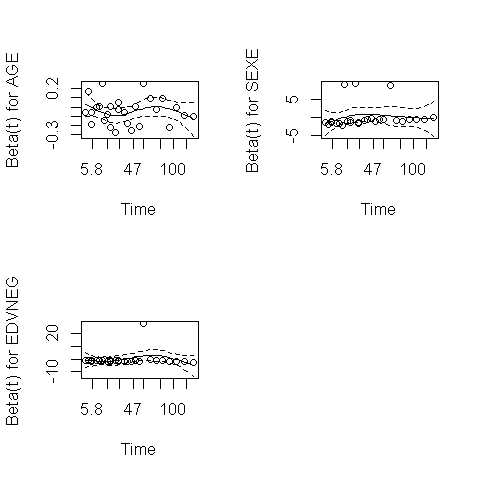

In [41]:
par(mfrow = c(2,2)) # plot a 2x2 grid
plot(cox.zph(mod)) # plots should be almost horizontal

Test incidence de variables catégorielles à plus de 2 classes, et interaction (AGA*SEXE) possibles.